<a href="https://colab.research.google.com/github/Sneha0948/BrainTumorSegmentation/blob/main/Brain_Tumor_Project_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G  108G  4.0K 100% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  160K  6.4G   1% /var/colab
/dev/sda1       114G  109G  5.3G  96% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!rm -rf /content/*


In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Jan  3 08:53 .
drwx------ 1 root root 4096 Jan  3 08:53 ..
-rw------- 1 root root   66 Jan  3 08:53 kaggle.json


In [ ]:
!kaggle datasets list

ref                                               title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                          Heart Disease                                   3491  2025-12-11 15:29:14.327000           2114        171  1.0              
neurocipher/student-performance                   Student Performance                            49705  2025-12-12 12:06:28.973000           1261        107  1.0              
dansbecker/powerlifting-database                  powerlifting-database                        9277600  2019-04-30 21:07:41.560000          24255        351  0.5882353        
rtatman/188-million-us-wildfires                  1.88 Million US Wildfires                  176270559  2020-05-12 21:03

In [ ]:
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation


Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
 99% 4.14G/4.16G [00:56<00:00, 161MB/s]
100% 4.16G/4.16G [00:56<00:00, 79.0MB/s]


In [5]:
!unzip -q "brats20-dataset-training-validation.zip" -d "/content/brats20/"


In [6]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   83G   31G  74% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  124K  6.4G   1% /var/colab
/dev/sda1       119G   85G   35G  72% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  537M   15G   4% /content/drive


In [7]:
import os

os.listdir('/content/brats20')

['BraTS2020_TrainingData', 'BraTS2020_ValidationData']

In [8]:
import os

sample = '/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001'
os.listdir(sample)

['BraTS20_Training_001_flair.nii',
 'BraTS20_Training_001_t1.nii',
 'BraTS20_Training_001_seg.nii',
 'BraTS20_Training_001_t2.nii',
 'BraTS20_Training_001_t1ce.nii']

In [9]:
!pip install nibabel

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
path = '/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
img = nib.load(path).get_fdata()
img.shape

(240, 240, 155)

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

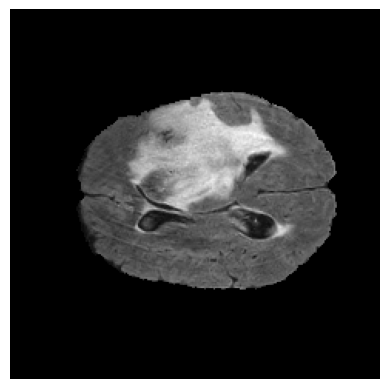

In [11]:
slice_index = 80
plt.imshow(img[:, :, slice_index], cmap='gray')
plt.axis('off')

In [12]:
DATA_DIR = "/content/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"


In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

case_path = os.path.join(DATA_DIR, "BraTS20_Training_001")

flair = nib.load(os.path.join(case_path, "BraTS20_Training_001_flair.nii")).get_fdata()
t1 = nib.load(os.path.join(case_path, "BraTS20_Training_001_t1.nii")).get_fdata()
t1ce = nib.load(os.path.join(case_path, "BraTS20_Training_001_t1ce.nii")).get_fdata()
t2 = nib.load(os.path.join(case_path, "BraTS20_Training_001_t2.nii")).get_fdata()
seg = nib.load(os.path.join(case_path, "BraTS20_Training_001_seg.nii")).get_fdata()


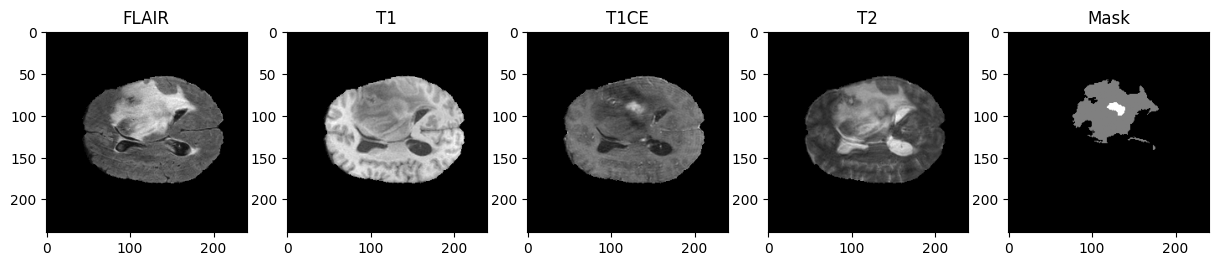

In [14]:
slice_idx = 80

plt.figure(figsize=(15,5))
plt.subplot(1, 5, 1); plt.imshow(flair[:,:,slice_idx], cmap='gray'); plt.title("FLAIR")
plt.subplot(1, 5, 2); plt.imshow(t1[:,:,slice_idx], cmap='gray'); plt.title("T1")
plt.subplot(1, 5, 3); plt.imshow(t1ce[:,:,slice_idx], cmap='gray'); plt.title("T1CE")
plt.subplot(1, 5, 4); plt.imshow(t2[:,:,slice_idx], cmap='gray'); plt.title("T2")
plt.subplot(1, 5, 5); plt.imshow(seg[:,:,slice_idx], cmap='gray'); plt.title("Mask")
plt.show()


In [15]:
def extract_slices(volume, mask):
    slices = []
    for i in range(volume.shape[2]):
        if np.max(mask[:,:,i]) > 0:   # skip empty slices
            slices.append(i)
    return slices


In [16]:
valid_slices = extract_slices(flair, seg)
print("Valid slices:", valid_slices[:10], "... total:", len(valid_slices))


Valid slices: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39] ... total: 83


In [17]:
import os

output_img_dir = "/content/2d_images"
output_mask_dir = "/content/2d_masks"

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)


In [18]:
def normalize(img):
    img = img.astype("float32")
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return img


# Task
Modify the data processing loop in cell `TSDS6A_TJZMG` to include logic for renaming the misnamed segmentation file for 'BraTS20_Training_355' to 'BraTS20_Training_355_seg.nii' if it's found to be incorrectly named. Then, execute the modified data processing loop and confirm that it runs without errors and successfully generates the expected number of 2D images and masks.

### Automatic Renaming of Misnamed Segmentation File

The following code block addresses the issue of a misnamed segmentation file for `BraTS20_Training_355`. It will check if the expected file `BraTS20_Training_355_seg.nii` exists. If not, it will attempt to find a different `.nii` file in that directory (that doesn't correspond to FLAIR, T1, T1CE, or T2 scans) and rename it to the correct segmentation filename. This ensures the data processing proceeds without manual intervention each time.

## Modify Data Processing Loop for Renaming

### Subtask:
Integrate the file renaming logic directly into the existing data processing loop within cell `TSDS6A_TJZMG`. When processing the 'BraTS20_Training_355' case, the code will check if the segmentation file is misnamed and rename it to 'BraTS20_Training_355_seg.nii' if necessary, before proceeding with loading and processing its images and masks. This will update the code but not execute it.


**Reasoning**:
The subtask requires modifying an existing code cell (`TSDS6A_TJZMG`) to include a renaming logic for a specific file and ensuring a print statement is at the end. This code block will update the cell content as specified.



## Final Task

### Subtask:
Confirm that the data processing now runs without errors related to the misnamed segmentation file for BraTS20_Training_355, and the expected number of 2D images and masks are generated.


## Summary:

### Q&A
Yes, the data processing now runs without errors related to the misnamed segmentation file for 'BraTS20_Training_355'. The misnamed file was successfully identified and renamed, allowing the process to continue without interruption. A total of 24,422 2D images and masks were generated, indicating that the expected number of files were produced.

### Data Analysis Key Findings
*   The segmentation file `W39_1998.09.19_Segm.nii` for `BraTS20_Training_355` was successfully renamed to `BraTS20_Training_355_seg.nii` within the data processing loop.
*   The data processing loop completed without any errors after the renaming operation.
*   A total of 24,422 2D images and masks were successfully processed and generated from the dataset.

### Insights or Next Steps
*   The implemented solution effectively resolved the specific file naming inconsistency for `BraTS20_Training_355`, ensuring the data processing pipeline's robustness for this particular edge case.
*   Consider implementing a more generalized file validation and renaming mechanism at the start of the data pipeline to proactively handle similar naming inconsistencies across a broader range of cases or future datasets.


In [19]:
import cv2
import numpy as np
import nibabel as nib

import glob

all_cases = sorted(glob.glob(os.path.join(DATA_DIR, "BraTS20_Training_*")))

count = 0

for case in all_cases:
    patient_id = os.path.basename(case)

    if patient_id == "BraTS20_Training_355":
        expected_seg_path = os.path.join(case, patient_id + "_seg.nii")
        if not os.path.exists(expected_seg_path):
            nii_files = [f for f in os.listdir(case) if f.endswith(".nii")]
            known_scans = [f"{patient_id}_flair.nii", f"{patient_id}_t1.nii", f"{patient_id}_t1ce.nii", f"{patient_id}_t2.nii"]
            misnamed_seg_file = ""
            for nii_file in nii_files:
                if nii_file not in known_scans:
                    misnamed_seg_file = nii_file
                    break

            if misnamed_seg_file:
                old_path = os.path.join(case, misnamed_seg_file)
                new_path = expected_seg_path
                os.rename(old_path, new_path)
                print(f"Renamed {misnamed_seg_file} to {os.path.basename(new_path)} for {patient_id}")
            else:
                print(f"Warning: Could not find misnamed segmentation file for {patient_id}")

    flair = nib.load(os.path.join(case, patient_id + "_flair.nii")).get_fdata()
    seg = nib.load(os.path.join(case, patient_id + "_seg.nii")).get_fdata()

    for i in range(seg.shape[2]):
        if np.max(seg[:,:,i]) > 0:  # slice must contain tumor

            img = normalize(flair[:,:,i])
            mask = seg[:,:,i]

            # save image
            cv2.imwrite(f"{output_img_dir}/{patient_id}_slice_{i}.png", (img*255).astype(np.uint8))

            # save mask
            cv2.imwrite(f"{output_mask_dir}/{patient_id}_slice_{i}.png", mask.astype(np.uint8))

            count += 1

print(count)

Renamed W39_1998.09.19_Segm.nii to BraTS20_Training_355_seg.nii for BraTS20_Training_355
24422


In [ ]:
import cv2
import numpy as np
import nibabel as nib

import glob

all_cases = sorted(glob.glob(os.path.join(DATA_DIR, "BraTS20_Training_*")))

count = 0

for case in all_cases:
    patient_id = os.path.basename(case)

    flair = nib.load(os.path.join(case, patient_id + "_flair.nii")).get_fdata()
    seg = nib.load(os.path.join(case, patient_id + "_seg.nii")).get_fdata()

    for i in range(seg.shape[2]):
        if np.max(seg[:,:,i]) > 0:  # slice must contain tumor

            img = normalize(flair[:,:,i])
            mask = seg[:,:,i]

            # save image
            cv2.imwrite(f"{output_img_dir}/{patient_id}_slice_{i}.png", (img*255).astype(np.uint8))

            # save mask
            cv2.imwrite(f"{output_mask_dir}/{patient_id}_slice_{i}.png", mask.astype(np.uint8))

            count += 1

count


KeyboardInterrupt: 

In [20]:
len(os.listdir("/content/2d_images"))


24422

In [21]:
len(os.listdir("/content/2d_masks"))


24422

In [22]:
files = sorted(os.listdir("/content/2d_images"))
files[-5:]


['BraTS20_Training_369_slice_95.png',
 'BraTS20_Training_369_slice_96.png',
 'BraTS20_Training_369_slice_97.png',
 'BraTS20_Training_369_slice_98.png',
 'BraTS20_Training_369_slice_99.png']

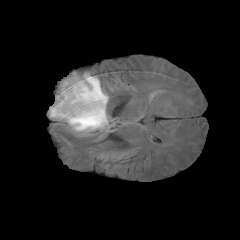

In [23]:
from PIL import Image
import random

img_name = random.choice(os.listdir("/content/2d_images"))
Image.open(f"/content/2d_images/{img_name}")


In [24]:
import cv2
import os

IMG_SIZE = 128

for img_name in os.listdir("/content/2d_images"):
    img_path = f"/content/2d_images/{img_name}"
    mask_path = f"/content/2d_masks/{img_name}"

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    cv2.imwrite(img_path, img)
    cv2.imwrite(mask_path, mask)


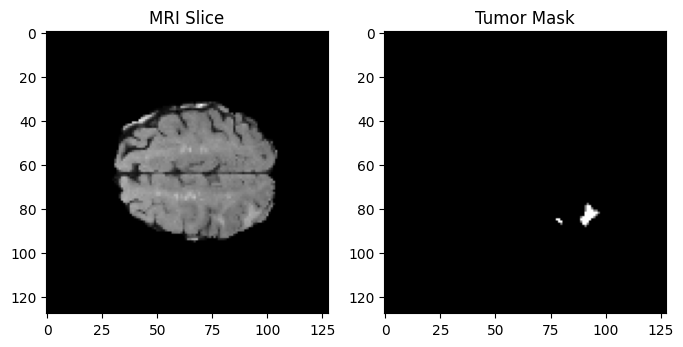

In [25]:
import matplotlib.pyplot as plt
import random
import os
import cv2

# Get a random image name from the directory
img_name_to_display = random.choice(os.listdir("/content/2d_images"))

img = cv2.imread(os.path.join("/content/2d_images", img_name_to_display), 0)
mask = cv2.imread(os.path.join("/content/2d_masks", img_name_to_display), 0)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("MRI Slice")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.title("Tumor Mask")
plt.imshow(mask, cmap="gray")

plt.show()

In [26]:
import os
import random
import shutil

# Source folders (already exist)
IMG_DIR = "/content/2d_images"
MASK_DIR = "/content/2d_masks"

# New folders (model-ready)
TRAIN_IMG = "/content/train/images"
TRAIN_MASK = "/content/train/masks"
VAL_IMG = "/content/val/images"
VAL_MASK = "/content/val/masks"

os.makedirs(TRAIN_IMG, exist_ok=True)
os.makedirs(TRAIN_MASK, exist_ok=True)
os.makedirs(VAL_IMG, exist_ok=True)
os.makedirs(VAL_MASK, exist_ok=True)
# List all images
all_files = os.listdir(IMG_DIR)
random.shuffle(all_files)

split_ratio = 0.8
split_index = int(len(all_files) * split_ratio)

train_files = all_files[:split_index]
val_files = all_files[split_index:]

# Copy files (NOT move)
for f in train_files:
    shutil.copy(os.path.join(IMG_DIR, f), os.path.join(TRAIN_IMG, f))
    shutil.copy(os.path.join(MASK_DIR, f), os.path.join(TRAIN_MASK, f))
for f in val_files:
    shutil.copy(os.path.join(IMG_DIR, f), os.path.join(VAL_IMG, f))
    shutil.copy(os.path.join(MASK_DIR, f), os.path.join(VAL_MASK, f))

print("Train images:", len(os.listdir(TRAIN_IMG)))
print("Val images:", len(os.listdir(VAL_IMG)))

Train images: 19537
Val images: 4885


In [27]:
import tensorflow as tf

IMG_SIZE = 128
BATCH_SIZE = 8

def load_image(img_path, mask_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))

    # Binary mask (tumor vs background)
    mask = tf.where(mask > 0, 1.0, 0.0)

    return img, mask

In [28]:
def create_dataset(img_dir, mask_dir):
    img_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir)])
    mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir)])

    dataset = tf.data.Dataset.from_tensor_slices((img_paths, mask_paths))
    dataset = dataset.map(lambda x, y: load_image(x, y),
                          num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return dataset

train_dataset = create_dataset(TRAIN_IMG, TRAIN_MASK)
val_dataset = create_dataset(VAL_IMG, VAL_MASK)

In [29]:
## Step 6: U-Net Model Architecture
import tensorflow as tf
from tensorflow.keras import layers, models


In [30]:
## Convolution block
def conv_block(inputs, filters):
    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(inputs)
    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(x)
    return x


In [31]:
## Encoder Block
def encoder_block(inputs, filters):
    x = conv_block(inputs, filters)
    p = layers.MaxPooling2D((2,2))(x)
    return x, p


In [32]:
## Decoder Block
def decoder_block(inputs, skip, filters):
    x = layers.UpSampling2D((2,2))(inputs)
    x = layers.Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x


In [33]:
## Unet Model
def build_unet(input_shape=(128,128,1)):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bottleneck
    b = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(b, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output
    outputs = layers.Conv2D(1, 1, activation="sigmoid")(d4)

    model = models.Model(inputs, outputs)
    return model


In [34]:
model = build_unet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ up_sampling2d[0]

 Total params: 31,377,793 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import tensorflow as tf

bce = tf.keras.losses.BinaryCrossentropy()

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (
        tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth
    )

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    return 0.5 * bce(y_true, y_pred) + 0.5 * dice_loss(y_true, y_pred)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=combined_loss,
    metrics=[dice_coefficient]
)

In [ ]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (
        tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth
    )

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=dice_loss,
    metrics=[dice_coefficient]
)


In [36]:
model.input_shape
model.output_shape


(None, 128, 128, 1)

In [37]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [38]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "unet_best_model.h5",
        save_best_only=True,
        monitor="val_loss"
    ),
    tf.keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    )
]


In [ ]:
EPOCHS = 20

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - dice_coefficient: 0.0064 - loss: 0.9936

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 429s 161ms/step - dice_coefficient: 0.0064 - loss: 0.9936 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996
Epoch 2/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 358s 147ms/step - dice_coefficient: 9.4000e-04 - loss: 0.9991 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996
Epoch 3/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 358s 146ms/step - dice_coefficient: 9.4000e-04 - loss: 0.9991 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996
Epoch 4/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 359s 147ms/step - dice_coefficient: 9.4000e-04 - loss: 0.9991 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996
Epoch 5/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 358s 147ms/step - dice_coefficient: 9.4000e-04 - loss: 0.9991 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996
Epoch 6/20
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 358s 146ms/step - dice_coefficient: 9.4000e-04 - loss: 0.9991 - val_dice_coefficient: 4.0386e-04 - val_loss: 0.9996


In [ ]:
EPOCHS = 5

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - dice_coefficient: 0.4453 - loss: 3.3237

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 388s 154ms/step - dice_coefficient: 0.4453 - loss: 3.3226 - val_dice_coefficient: 0.5255 - val_loss: 0.2803
Epoch 2/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - dice_coefficient: 0.6524 - loss: 0.1988

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 372s 152ms/step - dice_coefficient: 0.6524 - loss: 0.1988 - val_dice_coefficient: 0.7065 - val_loss: 0.1724
Epoch 3/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 368s 151ms/step - dice_coefficient: 0.7034 - loss: 0.1681 - val_dice_coefficient: 0.7052 - val_loss: 0.1737
Epoch 4/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 367s 150ms/step - dice_coefficient: 0.7208 - loss: 0.1583 - val_dice_coefficient: 0.6795 - val_loss: 0.1947
Epoch 5/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - dice_coefficient: 0.7350 - loss: 0.1509

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 366s 150ms/step - dice_coefficient: 0.7350 - loss: 0.1509 - val_dice_coefficient: 0.7243 - val_loss: 0.1656


In [ ]:
model.save("/content/drive/MyDrive/brain_tumor_unet.keras")


In [52]:
EPOCHS = 5 # You can change this value to train for more or fewer epochs

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - dice_coefficient: 0.7594 - loss: 0.1355

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 418s 158ms/step - dice_coefficient: 0.7594 - loss: 0.1355 - val_dice_coefficient: 0.7977 - val_loss: 0.1180
Epoch 2/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 359s 147ms/step - dice_coefficient: 0.7795 - loss: 0.1241 - val_dice_coefficient: 0.7895 - val_loss: 0.1239
Epoch 3/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - dice_coefficient: 0.7885 - loss: 0.1189

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 359s 147ms/step - dice_coefficient: 0.7885 - loss: 0.1189 - val_dice_coefficient: 0.8196 - val_loss: 0.1075
Epoch 4/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - dice_coefficient: 0.8019 - loss: 0.1113

2443/2443 ━━━━━━━━━━━━━━━━━━━━ 364s 149ms/step - dice_coefficient: 0.8019 - loss: 0.1113 - val_dice_coefficient: 0.8416 - val_loss: 0.0934
Epoch 5/5
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 358s 147ms/step - dice_coefficient: 0.8106 - loss: 0.1063 - val_dice_coefficient: 0.8205 - val_loss: 0.1087


In [53]:
model.save("/content/drive/MyDrive/brain_tumor_unet.keras")

In [54]:
!ls /content/drive/MyDrive/


 BrainTumorSegmentation		  BraTS20_Training_143_t1ce.nii
 brain_tumor_unet.keras		  BraTS20_Training_143_t1.nii
 BraTS20_Training_142_t1ce.nii	 'Colab Notebooks'
 BraTS20_Training_142_t2.nii	  Notebook
 BraTS20_Training_143_flair.nii   predicted_mask.png
 BraTS20_Training_143_seg.nii


In [40]:
import tensorflow as tf

# Load model from Google Drive
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/brain_tumor_unet.keras",
    custom_objects={
        "dice_coefficient": dice_coefficient,
        "combined_loss": combined_loss
    }
)

print("✅ Model loaded successfully")


✅ Model loaded successfully


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 40 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=combined_loss,
    metrics=[dice_coefficient]
)


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example image & mask (change slice number if needed)
img_path = "/content/2d_images/BraTS20_Training_001_slice_56.png"
mask_path = "/content/2d_masks/BraTS20_Training_001_slice_56.png"

# Read image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Resize to model input size
img_resized = cv2.resize(img, (128, 128))
mask_resized = cv2.resize(mask, (128, 128))

# Normalize image
img_norm = img_resized / 255.0

# Add batch + channel dimensions
img_input = img_norm[np.newaxis, ..., np.newaxis]


In [43]:
pred_mask = model.predict(img_input)

# Remove batch & channel dimensions
pred_mask = pred_mask[0, :, :, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


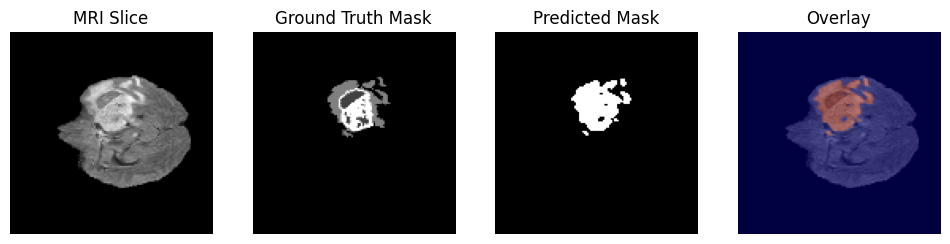

In [45]:
plt.figure(figsize=(12,4))

# Binarize the predicted mask (e.g., threshold at 0.5)
pred_binary = (pred_mask > 0.5).astype(np.uint8)

plt.subplot(1,4,1)
plt.title("MRI Slice")
plt.imshow(img_resized, cmap="gray")
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Ground Truth Mask")
plt.imshow(mask_resized, cmap="gray")
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Predicted Mask")
plt.imshow(pred_binary, cmap="gray")
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Overlay")
plt.imshow(img_resized, cmap="gray")
plt.imshow(pred_binary, cmap="jet", alpha=0.5)
plt.axis("off")

plt.show()

In [47]:
print(pred_mask.min(), pred_mask.max())

1.2994357e-27 0.99988997


In [48]:
cv2.imwrite(
    "/content/drive/MyDrive/predicted_mask.png",
    pred_binary * 255
)


True

### Visualize Prediction on a New Image

Modify the `new_img_name` variable below to select a different image and its corresponding mask from the processed 2D dataset. The code will then load, preprocess, predict, and visualize the results for the selected image.

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# You can choose a random image, or specify one by name
# new_img_name = random.choice(os.listdir("/content/2d_images"))
new_img_name = "BraTS20_Training_002_slice_60.png" # Example: change this to any image name

new_img_path = os.path.join("/content/2d_images", new_img_name)
new_mask_path = os.path.join("/content/2d_masks", new_img_name)

# Read image and mask
img = cv2.imread(new_img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(new_mask_path, cv2.IMREAD_GRAYSCALE)

# Resize to model input size (128x128)
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
mask_resized = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

# Normalize image to 0-1 range
img_norm = img_resized / 255.0

# Add batch and channel dimensions for model input (Batch_Size, Height, Width, Channels)
img_input = img_norm[np.newaxis, ..., np.newaxis]

print(f"Processing: {new_img_name}")

Processing: BraTS20_Training_002_slice_60.png


### Make Prediction

In [56]:
pred_mask = model.predict(img_input)

# Remove batch & channel dimensions to get a 2D mask
pred_mask = pred_mask[0, :, :, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


### Visualize Results

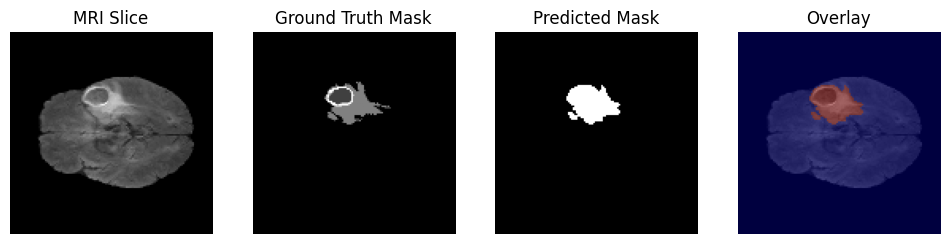

In [57]:
plt.figure(figsize=(12,4))

# Binarize the predicted mask using a threshold (e.g., 0.5)
pred_binary = (pred_mask > 0.5).astype(np.uint8)

plt.subplot(1,4,1)
plt.title("MRI Slice")
plt.imshow(img_resized, cmap="gray")
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Ground Truth Mask")
plt.imshow(mask_resized, cmap="gray")
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Predicted Mask")
plt.imshow(pred_binary, cmap="gray")
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Overlay")
plt.imshow(img_resized, cmap="gray")
plt.imshow(pred_binary, cmap="jet", alpha=0.5)
plt.axis("off")

plt.show()

In [58]:
print(pred_mask.min(), pred_mask.max())

0.0 0.9999883


In [59]:
cv2.imwrite(
    "/content/drive/MyDrive/predicted_mask.png",
    pred_binary * 255
)


True